In [18]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt



from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras import backend as K

In [2]:
# documentation & examples 
# 1- https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/  #DNN
# 2- https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/  #LSTM
# 3- https://adamnovotny.com/notebooks/lstm_synthetic_data.html  #LSTM

In [3]:
df1 = pd.read_csv("IEC_2017-2022v2.csv") 

C:\Users\UAE12\AppData\Local\Temp\ipykernel_9788\3046774235.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("IEC_2017-2022v2.csv")


In [4]:
df2 = df1.loc[df1['community'] == 345]
df2.head()

,Unnamed: 0.1,Unnamed: 0,community,rate_category,calendar_month,consumption,consumption_periods,year,month,day
31370031,0,0,345.0,ENORATE,201201,0.000045,2017-03-22,2017.0,3.0,22.0
31370032,1,1,345.0,ENORATE,201202,0.004710,2017-03-22,2017.0,3.0,22.0
31370033,2,2,345.0,ENORATE,201203,0.009421,2017-03-22,2017.0,3.0,22.0
31370034,3,3,345.0,ENORATE,201204,0.014131,2017-03-22,2017.0,3.0,22.0
31370035,4,4,345.0,ENORATE,201205,0.018842,2017-03-22,2017.0,3.0,22.0


In [5]:
df = df2.iloc[:, [2, 3, 4, 5]]
df.head()

,community,rate_category,calendar_month,consumption
31370031,345.0,ENORATE,201201,0.000045
31370032,345.0,ENORATE,201202,0.004710
31370033,345.0,ENORATE,201203,0.009421
31370034,345.0,ENORATE,201204,0.014131
31370035,345.0,ENORATE,201205,0.018842


In [6]:
df["rate_category"] = df["rate_category"].astype('category') # convert to object to category

C:\Users\UAE12\AppData\Local\Temp\ipykernel_9788\1204330131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rate_category"] = df["rate_category"].astype('category') # convert to object to category


In [7]:
df["rate_category"] = df["rate_category"].cat.codes

C:\Users\UAE12\AppData\Local\Temp\ipykernel_9788\3704998175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rate_category"] = df["rate_category"].cat.codes


In [8]:
df.head()

,community,rate_category,calendar_month,consumption
31370031,345.0,1,201201,0.000045
31370032,345.0,1,201202,0.004710
31370033,345.0,1,201203,0.009421
31370034,345.0,1,201204,0.014131
31370035,345.0,1,201205,0.018842


In [9]:
length = df.shape[0]
lengthnew = length*0.2
print(int(lengthnew))

495616


In [10]:
dfnew = df.iloc[0:int(lengthnew)]
dfnew.head()

,community,rate_category,calendar_month,consumption
31370031,345.0,1,201201,0.000045
31370032,345.0,1,201202,0.004710
31370033,345.0,1,201203,0.009421
31370034,345.0,1,201204,0.014131
31370035,345.0,1,201205,0.018842


In [11]:
dfnew.shape

(495616, 4)

In [12]:
#XX = df.iloc[:, [0, 1, 2, 3]]
#yy = df.iloc[:, [3]]
#yy.head()

train_X = dfnew #.drop(columns=['consumption'])
train_X.head(3)

,community,rate_category,calendar_month,consumption
31370031,345.0,1,201201,0.000045
31370032,345.0,1,201202,0.004710
31370033,345.0,1,201203,0.009421


In [13]:
train_y = dfnew[['consumption']]
train_y.head()

,consumption
31370031,0.000045
31370032,0.004710
31370033,0.009421
31370034,0.014131
31370035,0.018842


In [14]:
#train_X = np.asanyarray(train_Xp).astype('float32')
#train_y = np.asanyarray(train_yp).astype('float32')


from sklearn.model_selection import train_test_split
train_X, X_test, train_y, y_test = train_test_split(train_X, train_y, test_size = 0.1)

In [81]:
n_cols = train_X.shape[1]

model = Sequential()
model.add(Dense(12, input_shape=(n_cols,), activation='softplus')) 
model.add(Dense(10, activation='softplus')) 
model.add(Dense(1))

In [57]:
# Other mtrics
#def root_mean_squared_error(train_y, predictions):
#        return K.sqrt(K.mean(K.square(predictions - train_y))) 

#model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, metrics =["accuracy"])

In [82]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape']) # "MeanSquaredError", "MeanAbdoluteError", "MeanAbdolutePercentageError", 

early_stopping_monitor = EarlyStopping(patience=3)

In [84]:
model.fit(train_X, train_y,validation_split=0.3, epochs=30, batch_size=20, callbacks=[early_stopping_monitor])

Epoch 1/30
15612/15612 [==============================] - 27s 2ms/step - loss: 406758.1562 - mse: 406758.1562 - mae: 43.3359 - mape: 299197.3438 - val_loss: 30868.0449 - val_mse: 30868.0488 - val_mae: 163.6978 - val_mape: 253.9978
Epoch 2/30
15612/15612 [==============================] - 27s 2ms/step - loss: 210623.5156 - mse: 210623.5156 - mae: 59.3447 - mape: 242993.0000 - val_loss: 716.8834 - val_mse: 716.8833 - val_mae: 0.3741 - val_mape: 0.2420
Epoch 3/30
15612/15612 [==============================] - 27s 2ms/step - loss: 352759.0625 - mse: 352759.0625 - mae: 53.5693 - mape: 2652.2141 - val_loss: 226.8737 - val_mse: 226.8737 - val_mae: 1.8406 - val_mape: 0.7889
Epoch 4/30
15612/15612 [==============================] - 27s 2ms/step - loss: 370721.1562 - mse: 370721.1562 - mae: 53.0326 - mape: 1530703.6250 - val_loss: 461.3139 - val_mse: 461.3139 - val_mae: 1.2142 - val_mape: 1.7970
Epoch 5/30
15612/15612 [==============================] - 27s 2ms/step - loss: 123417.7969 - mse: 123

In [85]:
predictions = model.predict(train_X)  

13940/13940 [==============================] - 10s 713us/step


In [87]:
print(predictions)

[[ 154.88268]
 [1061.12   ]
 [2262.451  ]
 ...
 [ 260.60437]
 [ 419.64343]
 [ 270.1327 ]]


In [88]:
predictions.shape

(446054, 1)

In [89]:
train_X.shape

(446054, 4)

In [90]:
train_X.head()

,community,rate_category,calendar_month,consumption
0,345.0,5,201702,155.000000
1,345.0,5,201710,1061.232000
2,345.0,1,201507,2262.747301
3,345.0,0,201707,7141.280000
4,345.0,6,201709,332.004000


In [91]:
pp = pd.DataFrame(predictions, columns=['predictedcon'])
pp.head()

,predictedcon
0,154.882675
1,1061.119995
2,2262.450928
3,7140.971680
4,331.920776


In [92]:
train_X.reset_index(drop=True, inplace=True)
pp.reset_index(drop=True, inplace=True)

In [94]:
popo = pd.concat([train_X, pp], axis=1)
popo.head()

,community,rate_category,calendar_month,consumption,predictedcon
0,345.0,5,201702,155.000000,154.882675
1,345.0,5,201710,1061.232000,1061.119995
2,345.0,1,201507,2262.747301,2262.450928
3,345.0,0,201707,7141.280000,7140.971680
4,345.0,6,201709,332.004000,331.920776


In [95]:
df1 = popo[['consumption', 'community']]
df2 = popo[['predictedcon', 'community']]

                        sum
rate_category              
0              1.331927e+09
1              9.639018e+05
2              3.761612e+03
3              6.359216e+04
4              1.251696e+07
5              1.981780e+08
6              2.729365e+06


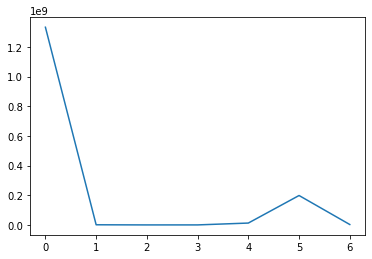

In [96]:
result1 = popo.groupby('rate_category')['consumption'].aggregate(['sum'])
print(result1)
plt.plot(result1)

                        sum
rate_category              
0              1.331907e+09
1              9.635889e+05
2              3.751243e+03
3              6.358763e+04
4              1.251688e+07
5              1.981695e+08
6              2.728854e+06


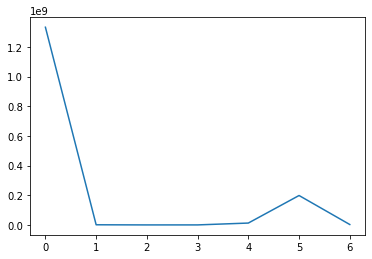

In [97]:
result2 = popo.groupby('rate_category')['predictedcon'].aggregate(['sum'])
print(result2)
plt.plot(result2)

In [98]:
popo.head(3)

,community,rate_category,calendar_month,consumption,predictedcon
0,345.0,5,201702,155.000000,154.882675
1,345.0,5,201710,1061.232000,1061.119995
2,345.0,1,201507,2262.747301,2262.450928


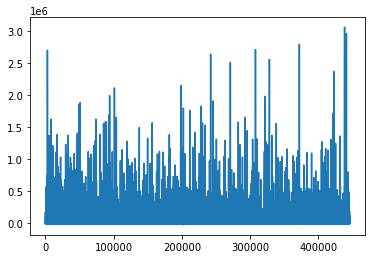

In [99]:
plt.plot(popo['consumption'])

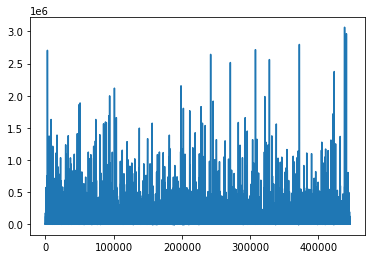

In [100]:
plt.plot(popo['predictedcon'])